In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import calendar
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df=pd.read_csv('fcc-forum-pageviews.csv')
df['date']=pd.to_datetime(df['date'], format='%Y-%m-%d')
df=df[(df.value>=df.value.quantile(0.025))&(df.value<=df.value.quantile(0.975))]

Text(0, 0.5, 'Page Views')

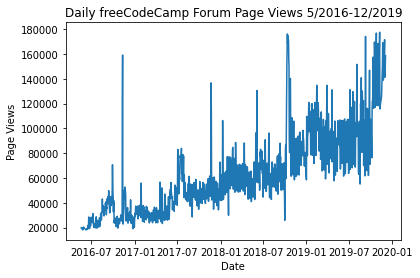

In [3]:
fig, ax = plt.subplots()
ax.plot(df.date, df.value)
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

In [16]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar=df.groupby([df.date.dt.year,df.date.dt.month])['value'].sum().rename_axis(index=['year', 'month']).reset_index()
    fig, ax = plt.subplots(figsize=(8,6))
    w1=0.6/12
    # for year1 in df_bar.year.unique().tolist():
    for month1 in range(1,13):
        dfl=df_bar[df_bar.month==month1]
        ax.bar(dfl.year+w1*(month1-6), dfl.value, w1, )
    ax.set_xticks(ticks=df_bar.year.unique().tolist())
    ax.ticklabel_format(style='plain')
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.legend([calendar.month_name[i] for i in range(1, 13)], title='Month')
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

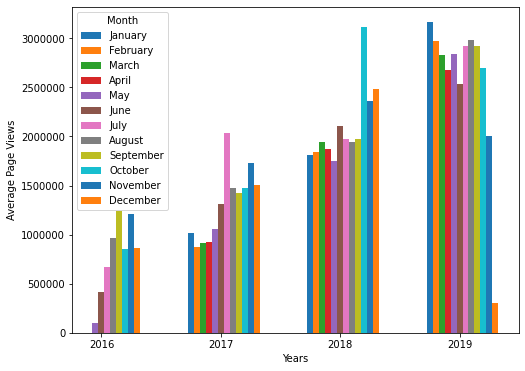

In [17]:

df_bar=df.groupby([df.date.dt.year,df.date.dt.month])['value'].sum().rename_axis(index=['year', 'month']).reset_index()
fig, ax = plt.subplots(figsize=(8,6))
w1=0.6/12
# for year1 in df_bar.year.unique().tolist():
for month1 in range(1,13):
    dfl=df_bar[df_bar.month==month1]
    ax.bar(dfl.year+w1*(month1-6), dfl.value, w1, )
ax.set_xticks(ticks=df_bar.year.unique().tolist())
ax.ticklabel_format(style='plain')
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.legend([calendar.month_name[i] for i in range(1, 13)], title='Month')

In [19]:
import matplotlib as mpl

In [21]:
[rect for rect in fig1.axes[0].get_children() if isinstance(rect, mpl.patches.Rectangle)]

In [29]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['Years'] = [d.year for d in df_box.date]
df_box['Month'] = [d.strftime('%b') for d in df_box.date]
df_box['mon_nr']=[d.month for d in df_box.date]

fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.boxplot(data=df_box, x="Year", y="value", ax=ax[0])
ax[0].set_title("Year-wise Box Plot (Trend)")
ax[0].set_ylabel('Page Views')
sns.boxplot(data=df_box.sort_values('mon_nr'), x="Month", y="value", ax=ax[1])
ax[1].set_title("Month-wise Box Plot (Seasonality)")
ax[1].set_ylabel('Page Views')

usage: ipykernel_launcher.py [-h] [-v] [-q] [--locals] [-f] [-c] [-b]
                             [-k TESTNAMEPATTERNS]
                             [tests ...]
ipykernel_launcher.py: error: argument -f/--failfast: ignored explicit argument 'c:\\Users\\menglin.li\\AppData\\Roaming\\jupyter\\runtime\\kernel-v2-53645b1DuIbNhSd2.json'


AssertionError: 

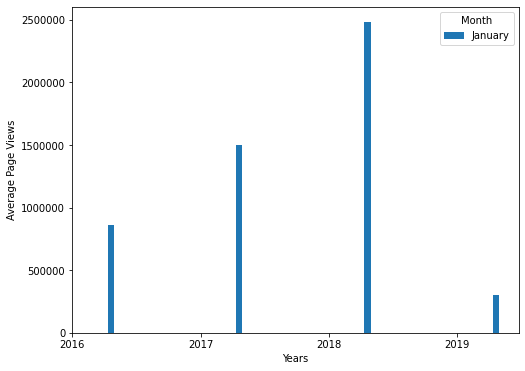

In [12]:
import time_series_visualizer
from unittest import main

# Test your function by calling it here
# time_series_visualizer.draw_line_plot()
time_series_visualizer.draw_bar_plot()
# time_series_visualizer.draw_box_plot()

# Run unit tests automatically
main(module='test_module', exit=False)